In [ ]:
import pandas as pd
import requests
from tqdm import tqdm


def get_govsg_df(dataset_id: str) -> pd.DataFrame:
    url = "https://data.gov.sg/api/action/datastore_search?resource_id=" + dataset_id
    response = requests.get(url)
    data = response.json()
    records = data["result"]["records"]
    pbar = tqdm(total=data["result"]["total"], desc=data["result"]["resource_id"])
    pbar.update(len(data["result"]["records"]))
    while data["result"]["records"]:  # returns empty list after last row
        url = "https://data.gov.sg" + data["result"]["_links"]["next"]
        response = requests.get(url)
        data = response.json()
        records += data["result"]["records"]
        pbar.update(len(data["result"]["records"]))
    pbar.close()
    return pd.DataFrame(records)


df = get_govsg_df("d_05fffefe9045d234eb140d7db0acdeb9")
df.head()

d_05fffefe9045d234eb140d7db0acdeb9: 100%|██████████| 3076/3076 [00:12<00:00, 239.76it/s]


,_id,uid,sample,gender,age_2,dwelling,industry,social_involve_1,social_involve_2,social_involve_3,social_involve_4,social_involve_5,social_involve_6,social_involve_7,social_involve_8,social_involve_9,volunteerdonate_1,volunteerdonate_2,volunteerdonate_3,volunteerdonate_4,volunteerdonate_5,volunteerdonate_6,volunteerdonate_7,volunteerdonate_8,volunteerdonate_9,volunteerdonate_freq,volunteerdonate_metd,snetwork_ethnicity,snetwork_nationality,snetwork_religion,snetwork_income,snetwork_education,snetwork_sorientation,close_sg_friends,sinteract_meal,sinteract_invitedfriend,sinteract_beeninvited,sinteract_participated,support_immedfam,support_extfam,...,pillarvals_21,pillarvals_22,pillarvals_23,pillarvals_24,pillarvals_25,pillarvals_26,pillarvals_29,pillarvals_30,pillarvals_31,pillarvals_32,pillarvals_33,online_news,online_sm,online_shop,online_areasinterest,online_games,online_update,online_sharemedia,online_watchmedia,marital_stats,children,age_youngestchild,hh_grandparents,hh_parents,hh_siblings,hh_spouse,hh_children,hh_relatives,hh_helper,hh_mates,hh_employer_their_family,hh_grandchildren,hh_other,hh_none,highest_ed,institution_deg,occupation,mhi,mpi,weight
0,1,27,Resident (Citizen/PR),Female,25-34 years old,HDB 3 room,Wholesale and Retail Trade,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,-,-,Yes,Yes,No,Yes,Yes,Yes,No,Yes,No,Yes,Yes,10 - A lot,10 - A lot,...,9,6,6,6,7,6,6,6,6,6,9,Less frequently,Daily,Less frequently,A few times a month,Less frequently,Less frequently,Daily,Daily,Married,Yes,6,No,No,No,Yes,Yes,No,No,No,No,No,No,No,"Secondary/ high school / ""O / N"" Levels",-,"Sales and service staff (e.g. Chefs, Cooks, Ca...","S$3,001-S$4,000","Below S$1,000",0.727891904
1,2,33,Resident (Citizen/PR),Female,25-34 years old,HDB 3 room,Wholesale and Retail Trade,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,Less frequently,Both,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10 - A lot,10 - A lot,...,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,Less frequently,Daily,Daily,Daily,Less frequently,Less frequently,Less frequently,Daily,Married,No,-,No,Yes,No,Yes,No,No,No,No,No,No,No,No,Polytechnic / diploma,-,Self-employed / Freelancer,"S$2,001-S$3,000","S$1,000-2,000",0.855263478
2,3,46,Resident (Citizen/PR),Female,45-54 years old,HDB 4 room,Not currently working,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,No,Yes,-,-,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10 - A lot,10 - A lot,...,8,7,9,7,5,8,8,8,5,7,7,A few times a week,A few times a week,Less frequently,A few times a week,Less frequently,A few times a month,A few times a month,A few times a month,Married,Yes,15,No,No,No,Yes,Yes,No,No,No,No,No,No,No,"Secondary/ high school / ""O / N"" Levels",-,Home maker,"S$3,001-S$4,000",-,0.857862718
3,4,50,Resident (Citizen/PR),Male,55-64 years old,HDB 4 room,Not currently working,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,Yes,-,-,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,8,6,...,5,6,6,7,5,6,7,5,5,6,7,Less frequently,Less frequently,Less frequently,Less frequently,Less frequently,Less frequently,Less frequently,Less frequently,Married,Yes,More than 20 years old,No,No,No,Yes,Yes,No,No,No,No,No,No,No,"Secondary/ high school / ""O / N"" Levels",-,Unemployed,"S$4,001-S$5,000",-,1.000318165
4,5,52,Resident (Citizen/PR),Female,25-34 years old,HDB 3 room,Wholesale and Retail Trade,No,No,No,No,No,No,No,No,Yes,No,No,Yes,No,No,No,No,No,No,1-2 times a year,Informally i.e. not through any organization o...,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,No,No,10 - A lot,1,...,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,10 - Strongly agree,Daily,Daily,Less frequently,Daily,Daily,Daily,Less frequently,Daily,Mar

In [2]:
# cleaning the outcome_future column
df["outcome_future"] = df["outcome_future"].str.replace(
    "10 - I have a strong desire to be a part of shaping Singapore’s future", "10"
)
df["outcome_future"] = df["outcome_future"].str.replace(
    "0 - I don’t want to have any part of shaping Singapore’s future", "0"
)
df["outcome_future"] = df["outcome_future"].astype(int)

<Axes: xlabel='outcome_future'>

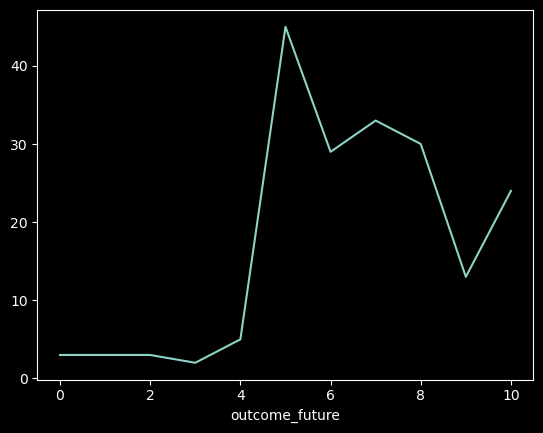

In [3]:
data = df[["dwelling", "outcome_future"]].value_counts(sort=False)
data["HDB 1-2 room"].plot()

<Axes: xlabel='outcome_future'>

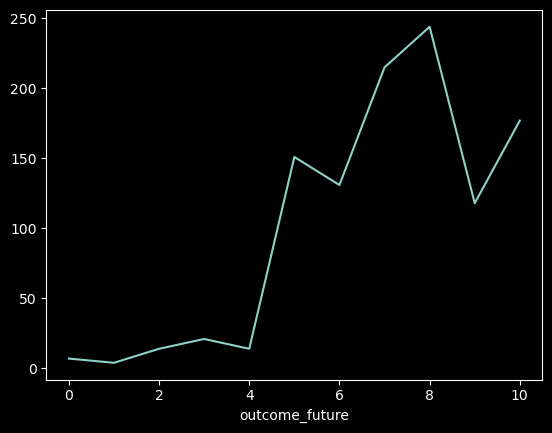

In [4]:
data["HDB 4 room"].plot()